# Modle trained on localily level which is used over here 

# Data fetch from database 

In [73]:
import pandas as pd
import numpy as np
import re
from sqlalchemy import create_engine , inspect

In [74]:
user = "postgres"
password = "mnbvcxz1234567"
host = "3.111.61.248" # "3.109.41.47"
port = 5432
database = "de_db"
 
conn = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(conn)

In [75]:
inspector = inspect(engine)
table_names = inspector.get_table_names()

In [76]:
table_names

['spatial_ref_sys',
 'indicatr',
 'city_poi',
 'city',
 'brand_nm_104_competitors',
 'district',
 'district_poi',
 'state',
 'property_data_cs',
 'city_cs_avgcount',
 'village',
 'd_date',
 'village_poi',
 'hexgrid08_poi',
 'locality',
 'locality_geo_cod',
 'property_data',
 'hexgrid08',
 'hexgrid08_cs',
 'locality_cs',
 'city_data',
 'property_footfall',
 'poi',
 'locality_bom',
 'locality_data',
 'brand_com',
 'property',
 'locality_peoplegraph_affluence',
 'hexgrid08_peoplegraph_affluence',
 'hexgrid08_footfall',
 'hexgrid08_data',
 'hexgrid08_h9']

In [80]:
df = pd.DataFrame()  # Initialize an empty DataFrame to hold the final result
indicator = ['is_tc', 't_name', 'loclty_cd', 'locality', 'green_space_density', 'public_infrastructure_index', 'transportation_hubs', 'total_digital_consumers', 'population_density', 'building_density', 'auto_dealership', 'auto_service_maintenance', 'motorcycle_dealership', 'truck_dealership', 'government_office', 'higher_education', 'library', 'amusement_park', 'bowling_centre', 'cinema', 'golf_course', 'ice_skating_rink', 'museum', 'nightlife', 'sports_centre', 'hospital', 'industrial_zone', 'police_station', 'clothing_store', 'consumer_electronics_store', 'convenience_store', 'department_store', 'grocery_store', 'home_specialty_store', 'office_supply_services_store', 'petrol_gasoline_station', 'sporting_goods_store', 'airport', 'bus_station', 'train_station', 'hotel', 'average_monthly_residential_rental_price']
town_name=  ('Chennai', 'Hyderabad', 'Jaipur', 'Ludhiana', 'Noida' , 'Pune')

for i in indicator:
    query = f"SELECT hexid08, t_name, is_tc, val AS {i} FROM public.hexgrid08_data WHERE indicatr = '{i}' AND t_name in {town_name} "
    result = engine.execute(query)
    rows = result.fetchall()
    
    if len(rows) > 0:  # If there are results for this indicator
        column_names = result.keys()
        temp_df = pd.DataFrame(rows, columns=column_names)
        
        # Dropping duplicate columns if they exist in the new DataFrame
        columns_to_drop = [col for col in temp_df.columns if col in df.columns]
        temp_df = temp_df.drop(columns=columns_to_drop, errors='ignore')
        
        # Concatenating the new DataFrame to the existing master DataFrame
        df = pd.concat([df, temp_df], axis=1)

# Now df contains the merged DataFrame without duplicate columns

In [252]:
# all colums required for prediction
print(df.shape)
df.head()

(6543, 41)


,hexid08,t_name,is_tc,green_space_density,public_infrastructure_index,transportation_hubs,total_digital_consumers,population_density,building_density,auto_dealership,...,grocery_store,home_specialty_store,office_supply_services_store,petrol_gasoline_station,sporting_goods_store,airport,bus_station,train_station,hotel,average_monthly_residential_rental_price
0,8860885291fffff,Pune,IND027521802814,0,0,0,2643,6111.68,0,1,...,12,4,0,0,0,0,0,0,0,None
1,88618c4d4dfffff,Chennai,IND033603803339,0.313361612,0,5,1446,18731.3,0,0,...,21,11,0,0,0,0,0,0,0,None
2,88424922c9fffff,Ludhiana,IND003041800196,0.965949874,0,0,2362,3265.3,1851.95,0,...,0,0,0,0,0,0,0,0,1,None
3,8860a25813fffff,Hyderabad,IND036536802918,0.819469747,0,0,1733,15352.65,0,0,...,0,0,40,1,0,0,0,0,0,None
4,883da13b59fffff,Noida,IND009141120227,0.748558465,0,0,6419,5948.17,398.11,3,...,0,0,32,2,0,0,0,0,0,16.50943396


In [253]:
df_2 = pd.DataFrame()  # Initialize an empty DataFrame to hold the final result
indicator = ['luxury_shoppers']
town_name=('Chennai', 'Hyderabad', 'Jaipur', 'Ludhiana', 'Noida' , 'Pune')

for i in indicator:
    query = f"SELECT hexid08, t_name, is_tc, val AS {i} FROM public.hexgrid08_cs WHERE indicatr = '{i}' AND t_name in {town_name} "
    result = engine.execute(query)
    rows = result.fetchall()
    
    if len(rows) > 0:  # If there are results for this indicator
        column_names = result.keys()
        temp_df_2 = pd.DataFrame(rows, columns=column_names)
        
        # Dropping duplicate columns if they exist in the new DataFrame
        columns_to_drop = [col for col in temp_df_2.columns if col in df_2.columns]
        temp_df_2 = temp_df_2.drop(columns=columns_to_drop, errors='ignore')
        
        # Concatenating the new DataFrame to the existing master DataFrame
        df_2 = pd.concat([df_2, temp_df_2], axis=1)

# Now df_2 contains the merged DataFrame without duplicate columns

In [273]:
df_2.head(11)

,hexid08,t_name,is_tc,luxury_shoppers
0,8860b1b30dfffff,Hyderabad,IND036536802918,NaN
1,88618eb069fffff,Chennai,IND033603803339,NaN
2,88618eb14bfffff,Chennai,IND033603803339,NaN
3,88618e86b7fffff,Chennai,IND033603803339,NaN
4,88618e85c3fffff,Chennai,IND033603803339,NaN
5,8860a25357fffff,Hyderabad,IND036536802918,NaN
6,8860a24267fffff,Hyderabad,IND036536802918,NaN
7,8860b1b265fffff,Hyderabad,IND036536802918,NaN
8,8860a24337fffff,Hyderabad,IND036536802918,NaN
9,88618c41dbfffff,Chennai,IND033603803339,7.1


In [11]:

query = f"select hexid08,t_name, loclty_cd, locality from public.hexgrid08 where t_name in ('Chennai', 'Hyderabad', 'Jaipur', 'Ludhiana', 'Noida' , 'Pune') "
result = engine.execute(query)
rows = result.fetchall()

column_names = result.keys()
hex_locality_map = pd.DataFrame(rows, columns=column_names)

In [12]:
hex_locality_map.head(2)

,hexid08,t_name,loclty_cd,locality
0,8860a2435dfffff,Hyderabad,IND03653680291800333,Aziznagar
1,8860b52f25fffff,Hyderabad,IND03653680291800371,Bandlaguda


In [255]:
df=df.sort_values('t_name').reset_index(drop=True)

In [256]:
df=df.merge(df_2 , on=['hexid08','t_name','is_tc'],how='left')
df.head(2)

,hexid08,t_name,is_tc,green_space_density,public_infrastructure_index,transportation_hubs,total_digital_consumers,population_density,building_density,auto_dealership,...,home_specialty_store,office_supply_services_store,petrol_gasoline_station,sporting_goods_store,airport,bus_station,train_station,hotel,average_monthly_residential_rental_price,luxury_shoppers
0,88618eb065fffff,Chennai,IND033603803339,0.572173058,0,4,514,920.92,0,0,...,0,6,1,0,0,0,1,2,None,1.8
1,88618c4f5dfffff,Chennai,IND033603803339,0.817923198,3.4,0,142,31414.91,0,0,...,0,0,0,0,0,0,0,0,None,0.3


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 0 to 6542
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   hexid08                                   6543 non-null   object 
 1   t_name                                    6543 non-null   object 
 2   is_tc                                     6543 non-null   object 
 3   green_space_density                       6543 non-null   object 
 4   public_infrastructure_index               6543 non-null   object 
 5   transportation_hubs                       6543 non-null   object 
 6   total_digital_consumers                   6543 non-null   object 
 7   population_density                        6543 non-null   object 
 8   building_density                          6543 non-null   object 
 9   auto_dealership                           6543 non-null   object 
 10  auto_service_maintenance            

In [258]:
for i in df.t_name.unique():
    print(i)
    df[df["t_name"]==i].info()

Chennai
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   hexid08                                   714 non-null    object 
 1   t_name                                    714 non-null    object 
 2   is_tc                                     714 non-null    object 
 3   green_space_density                       714 non-null    object 
 4   public_infrastructure_index               714 non-null    object 
 5   transportation_hubs                       714 non-null    object 
 6   total_digital_consumers                   714 non-null    object 
 7   population_density                        714 non-null    object 
 8   building_density                          714 non-null    object 
 9   auto_dealership                           714 non-null    object 
 10  auto_service_maintenance      

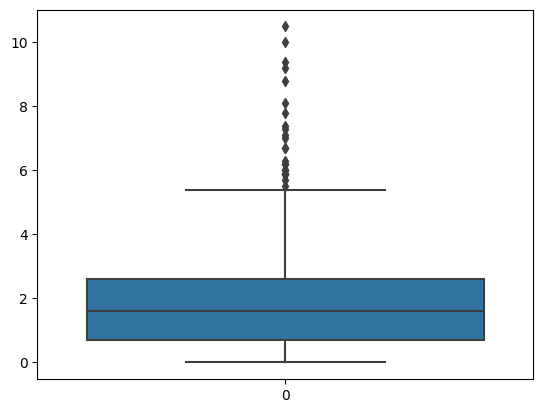

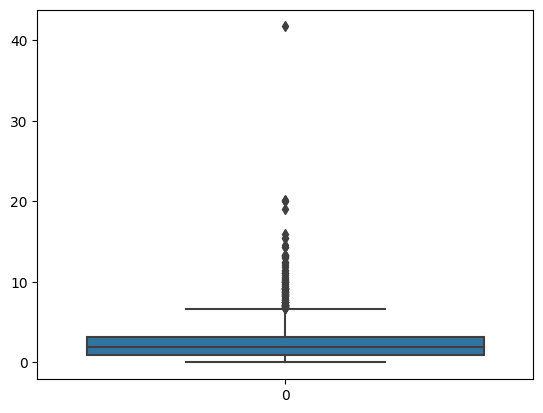

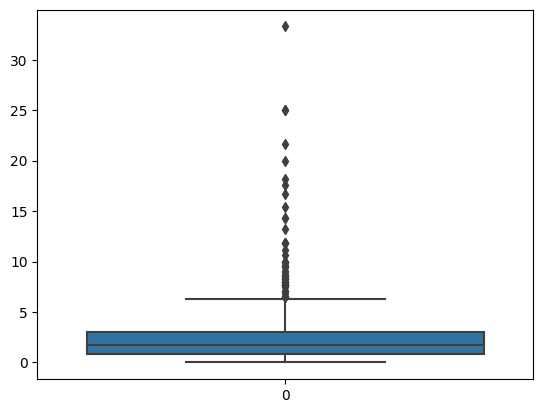

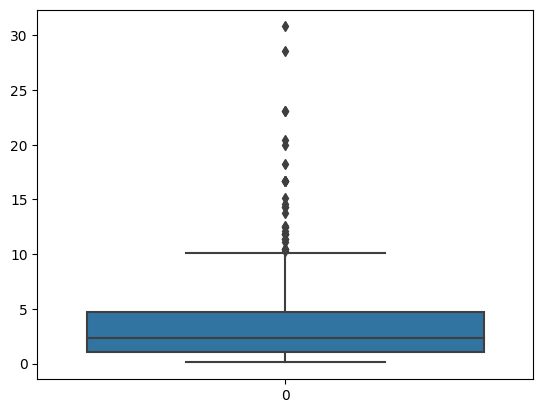

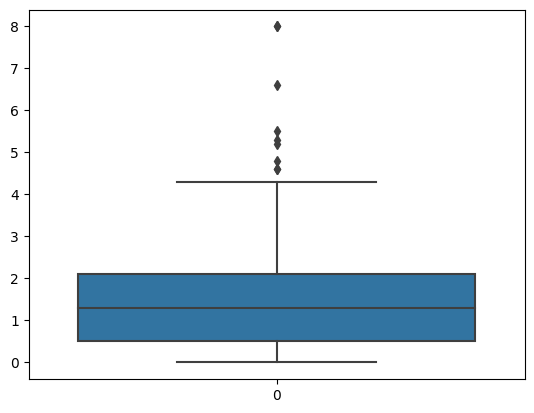

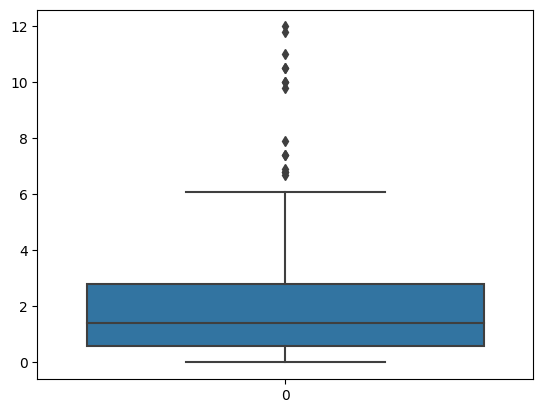

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.t_name.unique():
    plt.figure()
    sns.boxplot(df[df["t_name"]==i].reset_index(drop=True)['luxury_shoppers'])

In [260]:
df.to_csv(r"C:\Users\chemi\Desktop\check_4.csv",index=False)

In [261]:
df['luxury_shoppers'] = df.groupby('t_name')['luxury_shoppers'].transform(lambda x: x.fillna(x.median()))


In [288]:
df=df.merge(hex_locality_map,how ="left", on=['hexid08','t_name'])

In [307]:
df.columns

Index(['hexid08', 't_name', 'loclty_cd', 'locality', 'green_space_density',
       'public_infrastructure_index', 'transportation_hubs',
       'total_digital_consumers', 'pop_density_per_sqm',
       'building_density_per_sqm', 'luxery_percentage', 'auto_dealership',
       'auto_service_maintenance', 'motorcycle_dealership', 'truck_dealership',
       'government_office', 'higher_education', 'library', 'amusement_park',
       'bowling_centre', 'cinema', 'golf_course', 'ice_skating_rink', 'museum',
       'nightlife', 'sports_centre', 'hospital', 'industrial_zone',
       'police_station', 'clothing_store', 'consumer_electronics_store',
       'convenience_store', 'department_store', 'grocery_store',
       'home_specialty_store', 'office_supply_services_store',
       'petrol_gasoline_station', 'sporting_goods_store', 'airport',
       'bus_station', 'train_station', 'hotel',
       'average_monthly_residential_rental_price'],
      dtype='object')

In [293]:
df.rename(columns=({'population_density':'pop_density_per_sqm','building_density':'building_density_per_sqm',"luxury_shoppers":"luxery_percentage"}),inplace =True)

In [311]:
df=df[['hexid08', 't_name','loclty_cd', 'locality', 'green_space_density', 'public_infrastructure_index', 'transportation_hubs', 'total_digital_consumers', 'pop_density_per_sqm', 'building_density_per_sqm', 'luxery_percentage', 'auto_dealership', 'auto_service_maintenance', 'motorcycle_dealership', 'truck_dealership', 'government_office', 'higher_education', 'library', 'amusement_park', 'bowling_centre', 'cinema', 'golf_course', 'ice_skating_rink', 'museum', 'nightlife', 'sports_centre', 'hospital', 'industrial_zone', 'police_station', 'clothing_store', 'consumer_electronics_store', 'convenience_store', 'department_store', 'grocery_store', 'home_specialty_store', 'office_supply_services_store', 'petrol_gasoline_station', 'sporting_goods_store', 'airport', 'bus_station', 'train_station', 'hotel', 'average_monthly_residential_rental_price']]

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 0 to 6542
Data columns (total 43 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   hexid08                                   6543 non-null   object 
 1   t_name                                    6543 non-null   object 
 2   loclty_cd                                 6543 non-null   object 
 3   locality                                  6543 non-null   object 
 4   green_space_density                       6543 non-null   object 
 5   public_infrastructure_index               6543 non-null   object 
 6   transportation_hubs                       6543 non-null   object 
 7   total_digital_consumers                   6543 non-null   object 
 8   pop_density_per_sqm                       6543 non-null   object 
 9   building_density_per_sqm                  6543 non-null   object 
 10  luxery_percentage                   

In [318]:
# Add non-numerical columns that you want to keep as is
non_numerical_columns = ['hexid08', 't_name', 'loclty_cd', 'locality']


numerical_columns = ['green_space_density',
       'public_infrastructure_index', 'transportation_hubs',
       'total_digital_consumers', 'pop_density_per_sqm',
       'building_density_per_sqm', 'luxery_percentage', 'auto_dealership',
       'auto_service_maintenance', 'motorcycle_dealership', 'truck_dealership',
       'government_office', 'higher_education', 'library', 'amusement_park',
       'bowling_centre', 'cinema', 'golf_course', 'ice_skating_rink', 'museum',
       'nightlife', 'sports_centre', 'hospital', 'industrial_zone',
       'police_station', 'clothing_store', 'consumer_electronics_store',
       'convenience_store', 'department_store', 'grocery_store',
       'home_specialty_store', 'office_supply_services_store',
       'petrol_gasoline_station', 'sporting_goods_store', 'airport',
       'bus_station', 'train_station', 'hotel',
       'average_monthly_residential_rental_price']


all_columns =  non_numerical_columns + numerical_columns 

# Change the data type of selected numerical columns to float
df[numerical_columns] = df[numerical_columns].astype(float)

# Display the DataFrame with updated data types
df=df[all_columns]

In [321]:
df_on_locality=df.groupby(['t_name','loclty_cd', 'locality',]).mean().reset_index()

C:\Users\chemi\AppData\Local\Temp\ipykernel_19800\46138343.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_on_locality=df.groupby(['t_name','loclty_cd', 'locality',]).mean().reset_index()


In [322]:
df_for_predict=df_on_locality

# when data from outside source 

In [218]:
import pandas as pd

In [219]:
luxery_df=pd.read_csv(r"D:\Sociometrik\rent prediction\data for prediction\goa\\raw_data\goa_hexgrid08_cs_v2.csv")
hex_loc_map=pd.read_csv(r"D:\Sociometrik\rent prediction\data for prediction\goa\\raw_data\goa_hex_locality_mapping.csv")

In [220]:
luxery_df.head(2)

,hexid08,s_name,is_sc,indicator_name,luxery_percentage
0,8860a90ea9fffff,Goa,IND030,Luxury Shoppers,7.8
1,8860a90c39fffff,Goa,IND030,Luxury Shoppers,0.4


In [221]:
hex_loc_map=hex_loc_map[['hexid08','loclty_cd','locality']]
hex_loc_map.head(2)

,hexid08,loclty_cd,locality
0,8860a90ea9fffff,IND03000213,Murda
1,8860a90c39fffff,IND03000300,Socorro


In [222]:
luxery_df=pd.merge(hex_loc_map,luxery_df,how='left',on='hexid08')
luxery_df=luxery_df[['hexid08','loclty_cd','locality','s_name','luxery_percentage']]
luxery_df.head(2)

,hexid08,loclty_cd,locality,s_name,luxery_percentage
0,8860a90ea9fffff,IND03000213,Murda,Goa,7.8
1,8860a90c39fffff,IND03000300,Socorro,Goa,0.4


In [223]:
luxery_df=luxery_df.groupby('loclty_cd').agg({'luxery_percentage':'mean'}).reset_index()
luxery_df.head(2)
luxery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loclty_cd          347 non-null    object 
 1   luxery_percentage  214 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


In [224]:
main_df=pd.read_excel(r"D:\Sociometrik\rent prediction\data for prediction\goa\\raw_data\Goa_data.xlsx")
main_df=main_df.drop(columns=['is_sdc','is_dc','sd_name','d_name'])
print(main_df.shape)
main_df.head(2)

(347, 45)


,s_name,is_sc,is_tc,t_name,loclty_cd,locality,green_space_density,public_infrastructure_index,transportation_hubs,total_digital_consumers,...,grocery_store,home_specialty_store,office_supply_services_store,petrol_gasoline_station,sporting_goods_store,airport,bus_station,train_station,hotel,average_monthly_residential_rental_price
0,Goa,IND030,IND030585803243,Panaji,IND03000001,3rd Mandovi Bridge,0.000,NaN,3,262,...,0,0,0,0,0,0,0,0,NaN,NaN
1,Goa,IND030,IND030586803255,Other Urban Area,IND03000002,Adcolna,0.596,NaN,0,629,...,13,0,0,0,0,0,0,0,NaN,NaN


In [225]:
other_col_df=pd.read_csv(r"D:\Sociometrik\rent prediction\data for prediction\goa\\raw_data\goa_auto_service_maint_hotel_infra_index_loc_final.csv")
other_col_df=other_col_df.drop(columns=['locality','is_tc','t_name'])
other_col_df.head(2)


,loclty_cd,public_infrastructure_index,auto_service_maintenance,hotel
0,IND03000213,1.0,201,190
1,IND03000271,0.5,274,114


In [226]:
main_df=main_df.merge(other_col_df,how='left',on=['loclty_cd']).merge(luxery_df,how='left',on=['loclty_cd'])

In [227]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 346
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   s_name                                    347 non-null    object 
 1   is_sc                                     347 non-null    object 
 2   is_tc                                     347 non-null    object 
 3   t_name                                    347 non-null    object 
 4   loclty_cd                                 347 non-null    object 
 5   locality                                  347 non-null    object 
 6   green_space_density                       347 non-null    float64
 7   public_infrastructure_index_x             0 non-null      float64
 8   transportation_hubs                       347 non-null    int64  
 9   total_digital_consumers                   347 non-null    int64  
 10  pop_density_per_sqm                   

In [228]:
main_df.to_csv(r'D:\Sociometrik\rent prediction\data for prediction\goa\combine_df.csv')

### load prepared_data

In [229]:
df_for_predict=pd.read_csv(r"D:\Sociometrik\rent prediction\data for prediction\goa\complete_data_for_prediction\formated_combine_df.csv")

In [230]:
df_for_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   s_name                                    347 non-null    object 
 1   is_sc                                     347 non-null    object 
 2   is_tc                                     347 non-null    object 
 3   t_name                                    347 non-null    object 
 4   loclty_cd                                 347 non-null    object 
 5   locality                                  347 non-null    object 
 6   green_space_density                       347 non-null    float64
 7   public_infrastructure_index               347 non-null    float64
 8   transportation_hubs                       347 non-null    int64  
 9   total_digital_consumers                   347 non-null    int64  
 10  pop_density_per_sqm                   

In [231]:
df_for_predict['luxery_percentage']=df_for_predict['luxery_percentage'].fillna(df_for_predict['luxery_percentage'].mean())

# After prepared data

In [323]:
import pickle

In [324]:
scale_data_m=pickle.load(open("scaling.pkl",'rb'))
rent_predict_m=pickle.load(open("rent_model_predcit.pkl",'rb'))

#Note:-column for data to predict
 ####['hexid08', 't_name', 'locality', 'green_space_density',
       'public_infrastructure_index', 'transportation_hubs',
       'total_digital_consumers', 'pop_density_per_sqm',
       'building_density_per_sqm', 'luxery_percentage', 'auto_dealership',
       'auto_service_maintenance', 'motorcycle_dealership', 'truck_dealership',
       'government_office', 'higher_education', 'library', 'amusement_park',
       'bowling_centre', 'cinema', 'golf_course', 'ice_skating_rink', 'museum',
       'nightlife', 'sports_centre', 'hospital', 'industrial_zone',
       'police_station', 'clothing_store', 'consumer_electronics_store',
       'convenience_store', 'department_store', 'grocery_store',
       'home_specialty_store', 'office_supply_services_store',
       'petrol_gasoline_station', 'sporting_goods_store', 'airport',
       'bus_station', 'train_station', 'hotel',
       'average_monthly_residential_rental_price'] # if average monthly residential exits for any grids

In [325]:
df_for_predict.head(3)

,t_name,loclty_cd,locality,green_space_density,public_infrastructure_index,transportation_hubs,total_digital_consumers,pop_density_per_sqm,building_density_per_sqm,luxery_percentage,...,grocery_store,home_specialty_store,office_supply_services_store,petrol_gasoline_station,sporting_goods_store,airport,bus_station,train_station,hotel,average_monthly_residential_rental_price
0,Chennai,IND03360380333900001,11th Avenue,0.122116,0.00,0.0,439.0,8963.63000,0.00,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.333333
1,Chennai,IND03360380333900002,3rd Street,0.151028,0.00,0.0,482.0,11410.52632,0.00,1.3,...,87.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,Chennai,IND03360380333900003,5th Avenue,0.035517,14.01,0.0,1217.0,812.00000,117.17,2.3,...,0.0,6.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [326]:
df_for_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   t_name                                    1399 non-null   object 
 1   loclty_cd                                 1399 non-null   object 
 2   locality                                  1399 non-null   object 
 3   green_space_density                       1399 non-null   float64
 4   public_infrastructure_index               1399 non-null   float64
 5   transportation_hubs                       1399 non-null   float64
 6   total_digital_consumers                   1399 non-null   float64
 7   pop_density_per_sqm                       1399 non-null   float64
 8   building_density_per_sqm                  1399 non-null   float64
 9   luxery_percentage                         1399 non-null   float64
 10  auto_dealership                     

In [328]:
# df_for_predict=df_for_predict.drop(columns=['s_name','is_sc','is_tc'])
df_for_predict.head(2)

,t_name,loclty_cd,locality,green_space_density,public_infrastructure_index,transportation_hubs,total_digital_consumers,pop_density_per_sqm,building_density_per_sqm,luxery_percentage,...,grocery_store,home_specialty_store,office_supply_services_store,petrol_gasoline_station,sporting_goods_store,airport,bus_station,train_station,hotel,average_monthly_residential_rental_price
0,Chennai,IND03360380333900001,11th Avenue,0.122116,0.0,0.0,439.0,8963.63000,0.0,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.333333
1,Chennai,IND03360380333900002,3rd Street,0.151028,0.0,0.0,482.0,11410.52632,0.0,1.3,...,87.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [329]:
old_df=df_for_predict[df_for_predict['average_monthly_residential_rental_price'].notna()].reset_index(drop=True)

In [333]:
print(old_df.shape)
old_df.head(2)

(816, 42)


,t_name,loclty_cd,locality,green_space_density,public_infrastructure_index,transportation_hubs,total_digital_consumers,pop_density_per_sqm,building_density_per_sqm,luxery_percentage,...,grocery_store,home_specialty_store,office_supply_services_store,petrol_gasoline_station,sporting_goods_store,airport,bus_station,train_station,hotel,average_monthly_residential_rental_price
0,Chennai,IND03360380333900001,11th Avenue,0.122116,0.000,0.0,439.0,8963.630,0.000,1.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.333333
1,Chennai,IND03360380333900005,Adambakkam,0.057536,5.534,0.6,1027.6,3659.974,350.838,3.06,...,2.6,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.4,19.456181


In [334]:
predicted_df = df_for_predict[df_for_predict['average_monthly_residential_rental_price'].isna()]

In [335]:
print(predicted_df.shape)
predicted_df.head()

(583, 42)


,t_name,loclty_cd,locality,green_space_density,public_infrastructure_index,transportation_hubs,total_digital_consumers,pop_density_per_sqm,building_density_per_sqm,luxery_percentage,...,grocery_store,home_specialty_store,office_supply_services_store,petrol_gasoline_station,sporting_goods_store,airport,bus_station,train_station,hotel,average_monthly_residential_rental_price
1,Chennai,IND03360380333900002,3rd Street,0.151028,0.00,0.0,482.0,11410.526320,0.00,1.3,...,87.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,Chennai,IND03360380333900003,5th Avenue,0.035517,14.01,0.0,1217.0,812.000000,117.17,2.3,...,0.0,6.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,Chennai,IND03360380333900004,Abiramapuram,0.276790,0.00,0.0,3908.0,22.600000,0.00,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN
8,Chennai,IND03360380333900009,Aminjikarai,0.103173,0.00,0.0,1691.0,4546.052632,37.81,0.7,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,Chennai,IND03360380333900010,Anakaputhur,0.077698,0.00,6.0,6335.0,10689.473680,1220.19,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [336]:
predicted_df=predicted_df.drop(columns=["average_monthly_residential_rental_price"])

In [337]:
predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 1396
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   t_name                        583 non-null    object 
 1   loclty_cd                     583 non-null    object 
 2   locality                      583 non-null    object 
 3   green_space_density           583 non-null    float64
 4   public_infrastructure_index   583 non-null    float64
 5   transportation_hubs           583 non-null    float64
 6   total_digital_consumers       583 non-null    float64
 7   pop_density_per_sqm           583 non-null    float64
 8   building_density_per_sqm      583 non-null    float64
 9   luxery_percentage             583 non-null    float64
 10  auto_dealership               583 non-null    float64
 11  auto_service_maintenance      583 non-null    float64
 12  motorcycle_dealership         583 non-null    float64
 13  truc

In [338]:
predicted_df=predicted_df.dropna()
print(predicted_df.shape)
predicted_df.head(2)

(583, 41)


,t_name,loclty_cd,locality,green_space_density,public_infrastructure_index,transportation_hubs,total_digital_consumers,pop_density_per_sqm,building_density_per_sqm,luxery_percentage,...,department_store,grocery_store,home_specialty_store,office_supply_services_store,petrol_gasoline_station,sporting_goods_store,airport,bus_station,train_station,hotel
1,Chennai,IND03360380333900002,3rd Street,0.151028,0.00,0.0,482.0,11410.52632,0.00,1.3,...,0.0,87.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Chennai,IND03360380333900003,5th Avenue,0.035517,14.01,0.0,1217.0,812.00000,117.17,2.3,...,0.0,0.0,6.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0


In [339]:
predicted_df=predicted_df.set_index(['t_name','locality','loclty_cd'])

In [340]:
predicted_df

green_space_density  \
t_name  locality        loclty_cd                                   
Chennai 3rd Street      IND03360380333900002             0.151028   
        5th Avenue      IND03360380333900003             0.035517   
        Abiramapuram    IND03360380333900004             0.276790   
        Aminjikarai     IND03360380333900009             0.103173   
        Anakaputhur     IND03360380333900010             0.077698   
...                                                           ...   
Pune    Undri Extention IND02752180281400107             0.013333   
        Viman Nagar     IND02752180281400111             0.030000   
        Visharant Wadi  IND02752180281400112             0.020000   
        Warje           IND02752180281400117             0.015000   
        Warje Malwadi   IND02752180281400118             0.026667   

                                              public_infrastructure_index  \
t_name  locality        loclty_cd                                           
Chennai 3rd Street      IND03360380333900002                     0.000000   
        5th Avenue      IND03360380333900003                    14.010000   
        Abiramapuram    IND03360380333900004                     0.000000   
        Aminjikarai     IND03360380333900009                     0.000000   
        Anakaputhur     IND03360380333900010                     0.000000   
...                                                                   ...   
Pune    Undri Extention IND02752180281400107                     3.576667   
        Viman Nagar     IND02752180281400111                     5.768333   
        Visharant Wadi  IND02752180281400112                     2.540000   
        Warje           IND02752180281400117                     1.377500   
        Warje Malwadi   IND02752180281400118                     3.763333   

                                              transportation_hubs  \
t_name  locality        loclty_cd                                   
Chennai 3rd Street      IND03360380333900002             0.000000   
        5th Avenue      IND03360380333900003             0.000000   
        Abiramapuram    IND03360380333900004             0.000000   
        Aminjikarai     IND03360380333900009             0.000000   
        Anakaputhur     IND03360380333900010             6.000000   
...                                                           ...   
Pune    Undri Extention IND02752180281400107             0.000000   
        Viman Nagar     IND02752180281400111             0.166667   
        Visharant Wadi  IND02752180281400112             0.500000   
        Warje           IND02752180281400117             2.875000   
        Warje Malwadi   IND02752180281400118             0.000000   

                                              total_digital_consumers  \
t_name  locality        loclty_cd                                       
Chennai 3rd Street      IND03360380333900002               482.000000   
        5th Avenue      IND03360380333900003              1217.000000   
        Abiramapuram    IND03360380333900004              3908.000000   
        Aminjikarai     IND03360380333900009              1691.000000   
        Anakaputhur     IND03360380333900010              6335.000000   
...                                                               ...   
Pune    Undri Extention IND02752180281400107              1038.666667   
        Viman Nagar     IND02752180281400111              2085.333333   
        Visharant Wadi  IND02752180281400112              1111.000000   
        Warje           IND02752180281400117              4242.250000   
        Warje Malwadi   IND02752180281400118              2609.333333   

                                              pop_density_per_sqm  \
t_name  locality        loclty_cd                                   
Chennai 3rd Street      IND03360380333900002         11410.526320   
        5th Avenue      IND03360380333900003           812.000000   
        Abiramapuram  

In [341]:
scaled_data=scale_data_m.transform(predicted_df)

In [342]:
rent_predict=rent_predict_m.predict(scaled_data)

In [343]:
len(rent_predict)

583

In [344]:
predicted_df['average_monthly_residential_rental_price']=rent_predict

In [345]:
old_df["status"]="old"
predicted_df["status"]="yes"

In [352]:
predicted_df=predicted_df.reset_index()

In [353]:
df_loc_final=pd.concat([old_df,predicted_df] )

In [354]:
df_loc_final

,t_name,loclty_cd,locality,green_space_density,public_infrastructure_index,transportation_hubs,total_digital_consumers,pop_density_per_sqm,building_density_per_sqm,luxery_percentage,...,home_specialty_store,office_supply_services_store,petrol_gasoline_station,sporting_goods_store,airport,bus_station,train_station,hotel,average_monthly_residential_rental_price,status
0,Chennai,IND03360380333900001,11th Avenue,0.122116,0.000000,0.000000,439.000000,8963.630000,0.000000,1.600000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000,0.000000,13.333333,old
1,Chennai,IND03360380333900005,Adambakkam,0.057536,5.534000,0.600000,1027.600000,3659.974000,350.838000,3.060000,...,0.200000,0.000000,0.000000,1.000000,0.0,0.000,0.000,0.400000,19.456181,old
2,Chennai,IND03360380333900006,Adyar,0.480300,2.631429,0.000000,6362.571429,2141.040802,66.441429,3.200000,...,3.714286,0.142857,0.428571,1.571429,0.0,0.000,0.000,0.000000,14.260000,old
3,Chennai,IND03360380333900007,Alandur,0.074526,3.080000,3.000000,7710.500000,6839.940000,0.000000,1.800000,...,0.000000,0.000000,0.500000,0.000000,0.0,0.000,0.000,0.000000,12.857143,old
4,Chennai,IND03360380333900008,Alwarpet,0.400400,19.000000,0.000000,205.000000,484.740000,1267.410000,3.300000,...,0.000000,1.000000,0.000000,6.000000,0.0,0.000,0.000,1.000000,29.097222,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,Pune,IND02752180281400107,Undri Extention,0.013333,3.576667,0.000000,1038.666667,7478.393333,156.776667,1.633333,...,0.000000,1.000000,0.000000,0.000000,0.0,0.000,0.000,1.000000,24.549161,yes
579,Pune,IND02752180281400111,Viman Nagar,0.030000,5.768333,0.166667,2085.333333,2947.139649,538.556667,4.466667,...,1.000000,3.000000,0.166667,0.000000,0.0,0.000,0.000,0.000000,24.997795,yes
580,Pune,IND02752180281400112,Visharant Wadi,0.020000,2.540000,0.500000,1111.000000,1653.908334,843.015000,0.750000,...,12.000000,4.000000,0.000000,1.000000,0.0,1.000,0.000,0.000000,26.035724,yes
581,Pune,IND02752180281400117,Warje,0.015000,1.377500,2.875000,4242.250000,4653.920329,33.028750,1.362500,...,0.000000,0.250000,0.000000,0.000000,0.0,0.625,0.375,0.125000,27.369005,yes


In [356]:
df_loc_final.to_csv(r"D:\Sociometrik\rent prediction\data for prediction\for 6 cities\predicted_rent_for_6_town.csv",index=False)

# for affluence

In [6]:
n_df= pd.read_csv(r"D:\Sociometrik\rent prediction\data for prediction\for 6 cities\predicted_rent_for_6_town.csv")

In [22]:
n_df=n_df[['t_name','loclty_cd','locality','average_monthly_residential_rental_price','luxery_percentage','green_space_density']]

In [8]:
df_cous_dig_exp = pd.DataFrame()  # Initialize an empty DataFrame to hold the final result
indicator = ['is_tc', 't_name', 'loclty_cd', 'locality',"population", "consumer_digital_expenditure"]
town_name=('Chennai', 'Hyderabad', 'Jaipur', 'Ludhiana', 'Noida' , 'Pune')

for i in indicator:
    query = f"SELECT hexid08, t_name, is_tc, val AS {i} FROM public.hexgrid08_data WHERE indicatr = '{i}' AND t_name in {town_name} "
    result = engine.execute(query)
    rows = result.fetchall()
    
    if len(rows) > 0:  # If there are results for this indicator
        column_names = result.keys()
        temp_df_cous_dig_exp = pd.DataFrame(rows, columns=column_names)
        
        # Dropping duplicate columns if they exist in the new DataFrame
        columns_to_drop = [col for col in temp_df_cous_dig_exp.columns if col in df_cous_dig_exp.columns]
        temp_df_cous_dig_exp = temp_df_cous_dig_exp.drop(columns=columns_to_drop, errors='ignore')
        
        # Concatenating the new DataFrame to the existing master DataFrame
        df_cous_dig_exp = pd.concat([df_cous_dig_exp, temp_df_cous_dig_exp], axis=1)

# Now df_cous_dig_exp contains the merged DataFrame without duplicate columns

In [13]:
df_cous_dig_exp=df_cous_dig_exp.merge(hex_locality_map,how='left')

In [16]:
df_cous_dig_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6543 entries, 0 to 6542
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   hexid08                       6543 non-null   object 
 1   t_name                        6543 non-null   object 
 2   is_tc                         6543 non-null   object 
 3   loclty_cd                     6543 non-null   object 
 4   locality                      6543 non-null   object 
 5   population                    6543 non-null   float64
 6   consumer_digital_expenditure  6543 non-null   float64
dtypes: float64(2), object(5)
memory usage: 408.9+ KB


In [15]:
# Add non-numerical columns that you want to keep as is
non_numerical_columns = ['hexid08', 't_name', 'is_tc','loclty_cd','locality']


numerical_columns = ['population','consumer_digital_expenditure']


all_columns =  non_numerical_columns + numerical_columns 

# Change the data type of selected numerical columns to float
df_cous_dig_exp[numerical_columns] = df_cous_dig_exp[numerical_columns].astype(float)

# Display the DataFrame with updated data types
df_cous_dig_exp=df_cous_dig_exp[all_columns]

In [17]:
df_cous_dig_exp=df_cous_dig_exp.groupby(['t_name','loclty_cd','locality']).agg({'population':'mean','consumer_digital_expenditure':'mean'}).reset_index()

In [18]:
df_cous_dig_exp["percapita"]=df_cous_dig_exp["consumer_digital_expenditure"]/df_cous_dig_exp["population"]

In [19]:
pd.set_option('display.float_format',lambda x: '%.3f' %x)
df_cous_dig_exp

,t_name,loclty_cd,locality,population,consumer_digital_expenditure,percapita
0,Chennai,IND03360380333900001,11th Avenue,203.000,3076.000,15.153
1,Chennai,IND03360380333900002,3rd Street,14345.000,77888.000,5.430
2,Chennai,IND03360380333900003,5th Avenue,1981.000,820556.000,414.213
3,Chennai,IND03360380333900004,Abiramapuram,22558.000,3664.000,0.162
4,Chennai,IND03360380333900005,Adambakkam,8321.000,73527.200,8.836
...,...,...,...,...,...,...
1394,Pune,IND02752180281400116,Wanwadi,9527.500,62807.000,6.592
1395,Pune,IND02752180281400117,Warje,8337.875,37982.750,4.555
1396,Pune,IND02752180281400118,Warje Malwadi,12088.333,56905.333,4.707
1397,Pune,IND02752180281400119,Yerawada,7266.467,112086.933,15.425


In [24]:
df_cous_dig_exp=df_cous_dig_exp.merge(n_df,how='left')

In [38]:
df_cous_dig_exp.to_csv(r"D:\Sociometrik\rent prediction\data for prediction\for 6 cities\check5.csv")

In [31]:
df_cous_dig_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1398
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   t_name                                    1399 non-null   object 
 1   loclty_cd                                 1399 non-null   object 
 2   locality                                  1399 non-null   object 
 3   population                                1399 non-null   float64
 4   consumer_digital_expenditure              1399 non-null   float64
 5   percapita                                 1399 non-null   float64
 6   average_monthly_residential_rental_price  1399 non-null   float64
 7   luxery_percentage                         1399 non-null   float64
 8   green_space_density                       1399 non-null   float64
dtypes: float64(6), object(3)
memory usage: 109.3+ KB


In [51]:
for i in df_cous_dig_exp[df_cous_dig_exp['population']==0].index:
    df_cous_dig_exp['percapita'][i]=0

C:\Users\chemi\AppData\Local\Temp\ipykernel_24036\2357628560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cous_dig_exp['percapita'][i]=0


In [54]:
df_cous_dig_exp[df_cous_dig_exp['population']==0].head(5)

,t_name,loclty_cd,locality,population,consumer_digital_expenditure,percapita,average_monthly_residential_rental_price,luxery_percentage,green_space_density
22,Chennai,IND03360380333900023,Broken Bridge,0.000,10494.000,0.000,9.948,1.600,0.051
71,Chennai,IND03360380333900071,Kovilancheri,0.000,372791.000,0.000,34.090,1.600,0.493
72,Chennai,IND03360380333900071,locality_not_available,0.000,943.000,0.000,28.226,1.600,0.215
150,Chennai,IND03360380333900148,Sparkling Sands Avenue,0.000,18450.000,0.000,45.871,1.600,0.003
177,Chennai,IND03360380333900175,Vemballiamman Koil Street,0.000,80309.000,0.000,26.801,1.600,0.000


In [55]:
score_col=["percapita",'average_monthly_residential_rental_price','luxery_percentage','green_space_density']
for i in score_col:
    df_cous_dig_exp[f"{i}_score"]=df_cous_dig_exp.groupby('t_name')[i].transform(lambda x: x / x.max())
    

In [56]:
df_cous_dig_exp

,t_name,loclty_cd,locality,population,consumer_digital_expenditure,percapita,average_monthly_residential_rental_price,luxery_percentage,green_space_density,percapita_score,average_monthly_residential_rental_price_score,luxery_percentage_score,green_space_density_score
0,Chennai,IND03360380333900001,11th Avenue,203.000,3076.000,15.153,13.333,1.600,0.122,0.008,0.115,0.160,0.159
1,Chennai,IND03360380333900002,3rd Street,14345.000,77888.000,5.430,40.086,1.300,0.151,0.003,0.345,0.130,0.196
2,Chennai,IND03360380333900003,5th Avenue,1981.000,820556.000,414.213,22.994,2.300,0.036,0.228,0.198,0.230,0.046
3,Chennai,IND03360380333900004,Abiramapuram,22558.000,3664.000,0.162,66.041,4.600,0.277,0.000,0.569,0.460,0.360
4,Chennai,IND03360380333900005,Adambakkam,8321.000,73527.200,8.836,19.456,3.060,0.058,0.005,0.168,0.306,0.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,Pune,IND02752180281400116,Wanwadi,9527.500,62807.000,6.592,27.772,1.000,0.045,0.000,0.238,0.100,0.327
1395,Pune,IND02752180281400117,Warje,8337.875,37982.750,4.555,27.369,1.363,0.015,0.000,0.235,0.136,0.109
1396,Pune,IND02752180281400118,Warje Malwadi,12088.333,56905.333,4.707,24.425,1.267,0.027,0.000,0.209,0.127,0.194
1397,Pune,IND02752180281400119,Yerawada,7266.467,112086.933,15.425,18.001,2.440,0.059,0.000,0.154,0.244,0.427


In [61]:
df_cous_dig_exp['average_score']=df_cous_dig_exp[['percapita_score','average_monthly_residential_rental_price_score','luxery_percentage_score','green_space_density_score']].mean(axis=1)




In [62]:
df_cous_dig_exp

,t_name,loclty_cd,locality,population,consumer_digital_expenditure,percapita,average_monthly_residential_rental_price,luxery_percentage,green_space_density,percapita_score,average_monthly_residential_rental_price_score,luxery_percentage_score,green_space_density_score,average_score
0,Chennai,IND03360380333900001,11th Avenue,203.000,3076.000,15.153,13.333,1.600,0.122,0.008,0.115,0.160,0.159,0.110
1,Chennai,IND03360380333900002,3rd Street,14345.000,77888.000,5.430,40.086,1.300,0.151,0.003,0.345,0.130,0.196,0.169
2,Chennai,IND03360380333900003,5th Avenue,1981.000,820556.000,414.213,22.994,2.300,0.036,0.228,0.198,0.230,0.046,0.175
3,Chennai,IND03360380333900004,Abiramapuram,22558.000,3664.000,0.162,66.041,4.600,0.277,0.000,0.569,0.460,0.360,0.347
4,Chennai,IND03360380333900005,Adambakkam,8321.000,73527.200,8.836,19.456,3.060,0.058,0.005,0.168,0.306,0.075,0.138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,Pune,IND02752180281400116,Wanwadi,9527.500,62807.000,6.592,27.772,1.000,0.045,0.000,0.238,0.100,0.327,0.166
1395,Pune,IND02752180281400117,Warje,8337.875,37982.750,4.555,27.369,1.363,0.015,0.000,0.235,0.136,0.109,0.120
1396,Pune,IND02752180281400118,Warje Malwadi,12088.333,56905.333,4.707,24.425,1.267,0.027,0.000,0.209,0.127,0.194,0.133
1397,Pune,IND02752180281400119,Yerawada,7266.467,112086.933,15.425,18.001,2.440,0.059,0.000,0.154,0.244,0.427,0.206


In [63]:
df_cous_dig_exp[f"affulence_score"]=df_cous_dig_exp.groupby('t_name')["average_score"].transform(lambda x: x / x.max())

In [64]:
df_cous_dig_exp

,t_name,loclty_cd,locality,population,consumer_digital_expenditure,percapita,average_monthly_residential_rental_price,luxery_percentage,green_space_density,percapita_score,average_monthly_residential_rental_price_score,luxery_percentage_score,green_space_density_score,average_score,affulence_score
0,Chennai,IND03360380333900001,11th Avenue,203.000,3076.000,15.153,13.333,1.600,0.122,0.008,0.115,0.160,0.159,0.110,0.224
1,Chennai,IND03360380333900002,3rd Street,14345.000,77888.000,5.430,40.086,1.300,0.151,0.003,0.345,0.130,0.196,0.169,0.342
2,Chennai,IND03360380333900003,5th Avenue,1981.000,820556.000,414.213,22.994,2.300,0.036,0.228,0.198,0.230,0.046,0.175,0.356
3,Chennai,IND03360380333900004,Abiramapuram,22558.000,3664.000,0.162,66.041,4.600,0.277,0.000,0.569,0.460,0.360,0.347,0.704
4,Chennai,IND03360380333900005,Adambakkam,8321.000,73527.200,8.836,19.456,3.060,0.058,0.005,0.168,0.306,0.075,0.138,0.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,Pune,IND02752180281400116,Wanwadi,9527.500,62807.000,6.592,27.772,1.000,0.045,0.000,0.238,0.100,0.327,0.166,0.419
1395,Pune,IND02752180281400117,Warje,8337.875,37982.750,4.555,27.369,1.363,0.015,0.000,0.235,0.136,0.109,0.120,0.302
1396,Pune,IND02752180281400118,Warje Malwadi,12088.333,56905.333,4.707,24.425,1.267,0.027,0.000,0.209,0.127,0.194,0.133,0.334
1397,Pune,IND02752180281400119,Yerawada,7266.467,112086.933,15.425,18.001,2.440,0.059,0.000,0.154,0.244,0.427,0.206,0.519


In [68]:
df_final=df_cous_dig_exp[['t_name','locality','loclty_cd','average_monthly_residential_rental_price','affulence_score']]

In [71]:
df_final=df_final.sort_values('t_name').reset_index(drop=True)

In [72]:
df_final.to_csv(r"C:\Users\chemi\Desktop\6town_rent&affluence.csv",index=False)